<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Projects/blob/main/Task_2_Unemployment_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Data

In [ ]:
unemployment_2020 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
print(unemployment_2020.info())
print(unemployment_2020[' Date'])
print(unemployment_2020.head())

#Convert the Estimated Employed to float
unemployment_2020[' Estimated Employed'] = unemployment_2020[' Estimated Employed'].astype('float')
print(unemployment_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None
0       31-01-2020
1       29-02-2020
2       3

In [ ]:
print(unemployment_2020.isna().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


# Data Preprocessing

In [ ]:
unemployment_2020[' Date'] = pd.to_datetime(unemployment_2020[' Date'])
print(unemployment_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    267 non-null    object        
 1    Date                                     267 non-null    datetime64[ns]
 2    Frequency                                267 non-null    object        
 3    Estimated Unemployment Rate (%)          267 non-null    float64       
 4    Estimated Employed                       267 non-null    float64       
 5    Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                  267 non-null    object        
 7   longitude                                 267 non-null    float64       
 8   latitude                                  267 non-null    float64       
dtypes: datetime64[ns](1), float64(5),

In [ ]:
#Create new column for month and year and day
unemployment_2020['Month'] = unemployment_2020[' Date'].dt.month
unemployment_2020['Day'] = unemployment_2020[' Date'].dt.day

print(unemployment_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    267 non-null    object        
 1    Date                                     267 non-null    datetime64[ns]
 2    Frequency                                267 non-null    object        
 3    Estimated Unemployment Rate (%)          267 non-null    float64       
 4    Estimated Employed                       267 non-null    float64       
 5    Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                  267 non-null    object        
 7   longitude                                 267 non-null    float64       
 8   latitude                                  267 non-null    float64       
 9   Month                           

In [ ]:
#Renaming the columns and removing the spaces
unemployment_2020.rename(columns={' Date ': 'Date',
                                  ' Frequency':'Frequency',
                                  ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                                  ' Estimated Employed':'Estimated Employed',
                                  ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)',
                                  'Region': 'States',
                                  'Region.1':'Region'}, inplace=True)
print(unemployment_2020.columns)

Index(['States', ' Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude', 'Month', 'Day'],
      dtype='object')


In [ ]:
print(unemployment_2020[['States','Frequency','Region']].value_counts())

States            Frequency  Region   
Andhra Pradesh     M         South        10
Assam              M         Northeast    10
Uttarakhand        M         North        10
Uttar Pradesh      M         North        10
Tripura            M         Northeast    10
Telangana          M         South        10
Tamil Nadu         M         South        10
Rajasthan          M         North        10
Punjab             M         North        10
Puducherry         M         South        10
Odisha             M         East         10
Meghalaya          M         Northeast    10
Maharashtra        M         West         10
Madhya Pradesh     M         West         10
Kerala             M         South        10
Karnataka          M         South        10
Jharkhand          M         East         10
Himachal Pradesh   M         North        10
Haryana            M         North        10
Gujarat            M         West         10
Goa                M         West         10
Delhi           

In [ ]:
#Convert States and Region to categorical values

unemployment_2020[['States','Region']] = unemployment_2020[['States','Region']].astype('category')
print(unemployment_2020.info())
print(unemployment_2020.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   States                                   267 non-null    category      
 1    Date                                    267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    float64       
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region                                   267 non-null    category      
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
 9   Month                                    26

In [ ]:
#Create a column with months in strings
import calendar

# Define a function to convert month number to month name
def get_month_name(month_number):
    return calendar.month_name[month_number]

# Apply the function to the 'month' column
unemployment_2020['month_name'] = unemployment_2020['Month'].apply(get_month_name)
print(unemployment_2020.head())

           States       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2020-01-31         M                             5.48   
1  Andhra Pradesh 2020-02-29         M                             5.83   
2  Andhra Pradesh 2020-03-31         M                             5.79   
3  Andhra Pradesh 2020-04-30         M                            20.51   
4  Andhra Pradesh 2020-05-31         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region  \
0          16635535.0                                    41.02  South   
1          16545652.0                                    40.90  South   
2          15881197.0                                    39.18  South   
3          11336911.0                                    33.10  South   
4          12988845.0                                    36.46  South   

   longitude  latitude  Month  Day month_name  
0    15.9129     79.74      1   31    January  
1    15.9129  

In [ ]:
#Statistical description
print(unemployment_2020.describe())

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       267.000000        2.670000e+02   
mean                         12.236929        1.396211e+07   
std                          10.803283        1.336632e+07   
min                           0.500000        1.175420e+05   
25%                           4.845000        2.838930e+06   
50%                           9.650000        9.732417e+06   
75%                          16.755000        2.187869e+07   
max                          75.850000        5.943376e+07   

       Estimated Labour Participation Rate (%)   longitude    latitude  \
count                               267.000000  267.000000  267.000000   
mean                                 41.681573   22.826048   80.532425   
std                                   7.845419    6.270731    5.831738   
min                                  16.770000   10.850500   71.192400   
25%                                  37.265000   18.112400   76.085600 

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

#Analyze the mean by states and region
region_group = unemployment_2020.groupby(['Region'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
print(region_group)

           Estimated Unemployment Rate (%)  Estimated Employed  \
Region                                                           
East                                 13.92         19602366.90   
North                                15.89         13072487.92   
Northeast                            10.95          3617105.53   
South                                10.45         14040589.33   
West                                  8.24         18623512.72   

           Estimated Labour Participation Rate (%)  
Region                                              
East                                         40.11  
North                                        38.70  
Northeast                                    52.06  
South                                        40.44  
West                                         41.26  


In [ ]:
state_group = unemployment_2020.groupby(['States'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean().reset_index()
print(state_group)

              States  Estimated Unemployment Rate (%)  Estimated Employed  \
0     Andhra Pradesh                             8.66         15425480.00   
1              Assam                             4.86         10810275.50   
2              Bihar                            19.47         23606828.00   
3       Chhattisgarh                             7.82          8421349.20   
4              Delhi                            18.41          4632821.90   
5                Goa                            12.17           442374.80   
6            Gujarat                             6.38         22730746.10   
7            Haryana                            27.48          6844059.00   
8   Himachal Pradesh                            16.07          2033884.90   
9    Jammu & Kashmir                            16.48          3310031.67   
10         Jharkhand                            19.54          8770642.40   
11         Karnataka                             7.67         21624017.60   

# Visualization

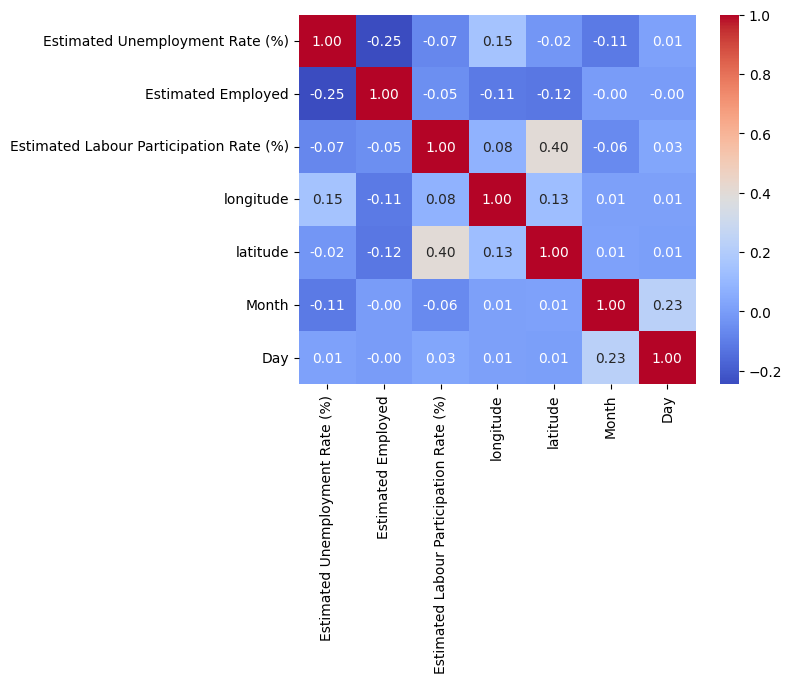

In [ ]:
#Heatmap
numerical_df = unemployment_2020.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')

plt.show()

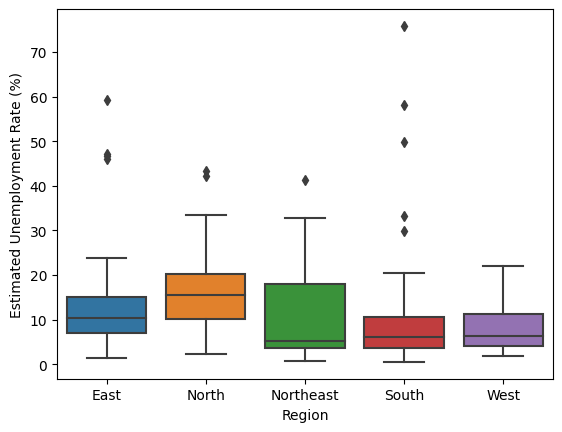

In [ ]:
#Unemployment rate across region
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)',data=unemployment_2020)
plt.show()

<Figure size 1600x600 with 0 Axes>

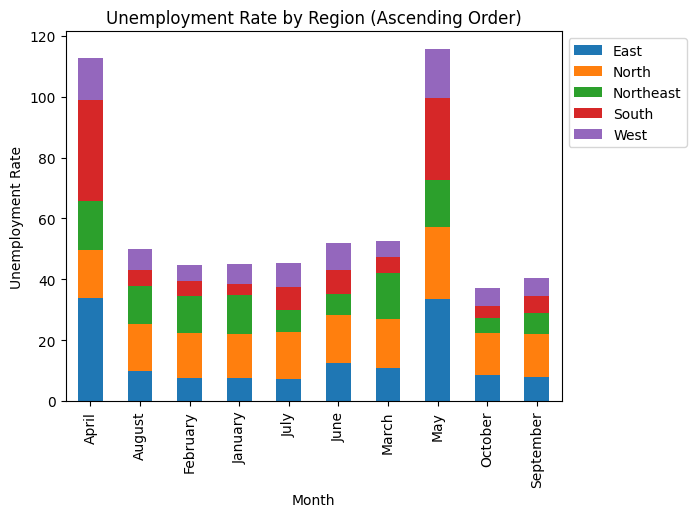

In [ ]:
plt.figure(figsize=(16,6))

pivot_data = unemployment_2020.pivot_table(index='month_name', columns='Region', values='Estimated Unemployment Rate (%)')

# Sort the values within each row in ascending order
pivot_data = pivot_data.apply(lambda row: row.sort_values(ascending=True), axis=1)

# Create the stacked bar plot
ax = pivot_data.plot(kind='bar', stacked=True)

# Set the x-axis label
ax.set_xlabel('Month')

# Set the y-axis label
ax.set_ylabel('Unemployment Rate')

# Set the plot title
ax.set_title('Unemployment Rate by Region (Ascending Order)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# Show the plot
plt.show()

From the plot, in the month of April and May, the rate of unemployment in the North and SOuth side of Indian was high

In [ ]:
import plotly.express as px

fig = px.bar(unemployment_2020, x='Region', y='Estimated Unemployment Rate (%)', animation_frame='month_name', color='States',
             title='Unemployment rate across regions from Jan. 2020 to Oct. 2020', height=700, template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Adjusting the animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

The North still the most affected with the highest rate of unemployment

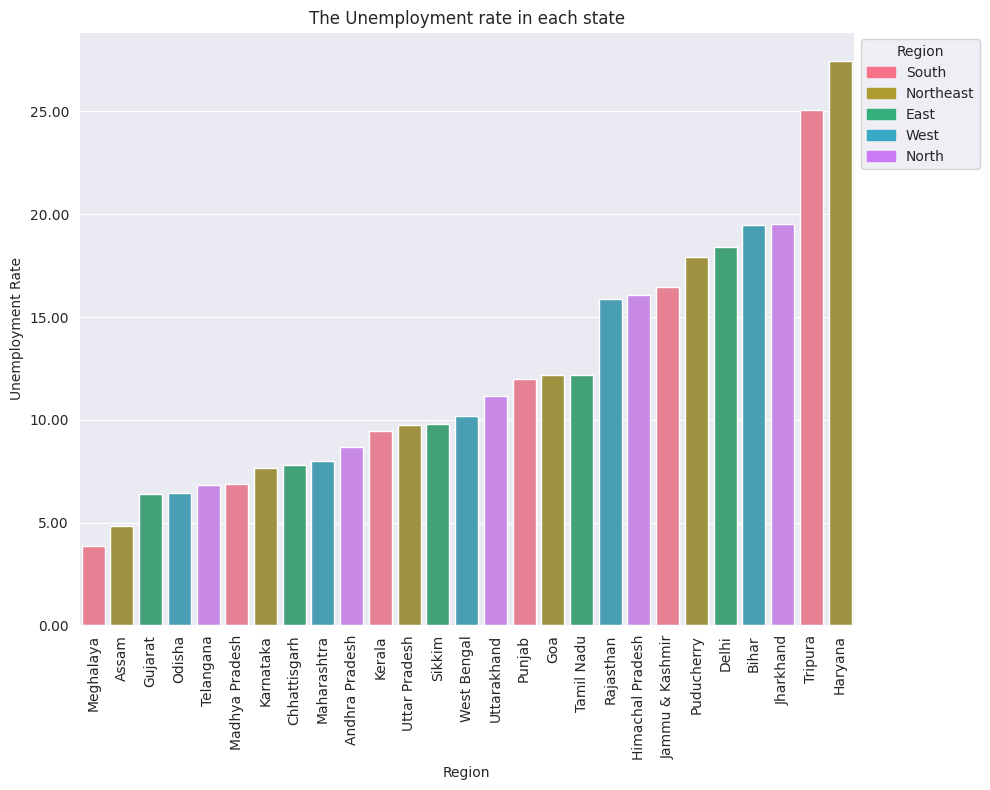

In [ ]:

from matplotlib.ticker import FuncFormatter

sns.set_style('darkgrid')
plt.figure(figsize=(10,8))

sorted_df = unemployment_2020.groupby('States').mean(numeric_only=True).sort_values(by='Estimated Unemployment Rate (%)', axis=0).reset_index()


region_palette = sns.color_palette("husl", n_colors=len(unemployment_2020['Region'].unique()))


# Create the bar plot
ax = sns.barplot(x='States', y='Estimated Unemployment Rate (%)', palette=region_palette, data=unemployment_2020, order=sorted_df['States'], errorbar=None)

# Set the x-axis label
ax.set_xlabel('Region')

# Set the y-axis label
ax.set_ylabel('Unemployment Rate')

# Set the plot title
ax.set_title('The Unemployment rate in each state')

#Legend
legend_labels = unemployment_2020['Region'].unique()
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=region_palette[i]) for i in range(len(legend_labels))]
ax.legend(legend_handles, legend_labels, title='Region', bbox_to_anchor=(1, 1), loc='upper left')

#Annotations
def format_hover(val, pos):
    return f'{val:.2f}'

ax.yaxis.set_major_formatter(FuncFormatter(format_hover))

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

mean_unemployment_by_region = unemployment_2020.groupby(['Region','States'])['Estimated Unemployment Rate (%)'].mean().reset_index()
# Create a treemap using Plotly Express
fig = px.treemap(mean_unemployment_by_region,
    path=['Region', 'States'],
    values='Estimated Unemployment Rate (%)',
    color='Estimated Unemployment Rate (%)',
    hover_data=['Estimated Unemployment Rate (%)'],
    title='Treemap showing Unemployment Rates in both States and Regions',
    color_continuous_scale='Viridis',
)

# Show the treemap
fig.show()

A Table showing a comparison before and after Lockdown unemployment rate

In [ ]:
#Filter unemployment rate before Lockdown..between the months of January and April 2020
before_lockdown = unemployment_2020[(unemployment_2020['Month'] >=4)]

#Lockdown period
Lockdown = unemployment_2020[(unemployment_2020['Month'] >= 5) & (unemployment_2020['Month'] <= 7)]

#mean unemployment rate before lockdown by state
mean_unemployment = before_lockdown.groupby('States')['Estimated Unemployment Rate (%)'].mean().reset_index()

#Mean unemployment rate by region
region_unemployment = before_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

#Mean unemployment rate during and after Lockdown by states
mean_unemployment_during = Lockdown.groupby('States')['Estimated Unemployment Rate (%)'].mean().reset_index()

#Mean unemployment rate during and after Lockdown by states
region_unemployment_during = Lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
mean_unemployment_during['Unemployment Rate before lockdown'] = mean_unemployment['Estimated Unemployment Rate (%)']
region_unemployment_during['Unemployment Rate before lockdown'] = region_unemployment['Estimated Unemployment Rate (%)']


mean_unemployment_during.columns = ['States','Unemployment Rate before lockdown','Unemployment Rate after lockdown']
region_unemployment_during.columns = ['Region','Unemployment Rate before lockdown','Unemployment Rate after lockdown']

mean_unemployment_during.head()





,States,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,9.69,9.93
1,Assam,4.64,4.96
2,Bihar,25.52,22.63
3,Chhattisgarh,11.67,7.52
4,Delhi,26.92,18.58


In [ ]:
region_unemployment_during.head()

,Region,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,East,17.75,16.17
1,North,18.22,16.23
2,Northeast,9.83,10.03
3,South,14.27,12.98
4,West,10.84,9.27


In [ ]:
#Percentage Change in each region
region_unemployment_during['Percentage Change after lockdown'] = region_unemployment_during['Unemployment Rate after lockdown'] - region_unemployment_during['Unemployment Rate before lockdown'] / region_unemployment_during['Unemployment Rate before lockdown']
sorted_per = region_unemployment_during.sort_values('Percentage Change after lockdown', ascending = False
                                                    )
print(sorted_per)


      Region  Unemployment Rate before lockdown  \
1      North                              18.22   
0       East                              17.75   
3      South                              14.27   
2  Northeast                               9.83   
4       West                              10.84   

   Unemployment Rate after lockdown  Percentage Change after lockdown  
1                             16.23                             15.23  
0                             16.17                             15.17  
3                             12.98                             11.98  
2                             10.03                              9.03  
4                              9.27                              8.27  


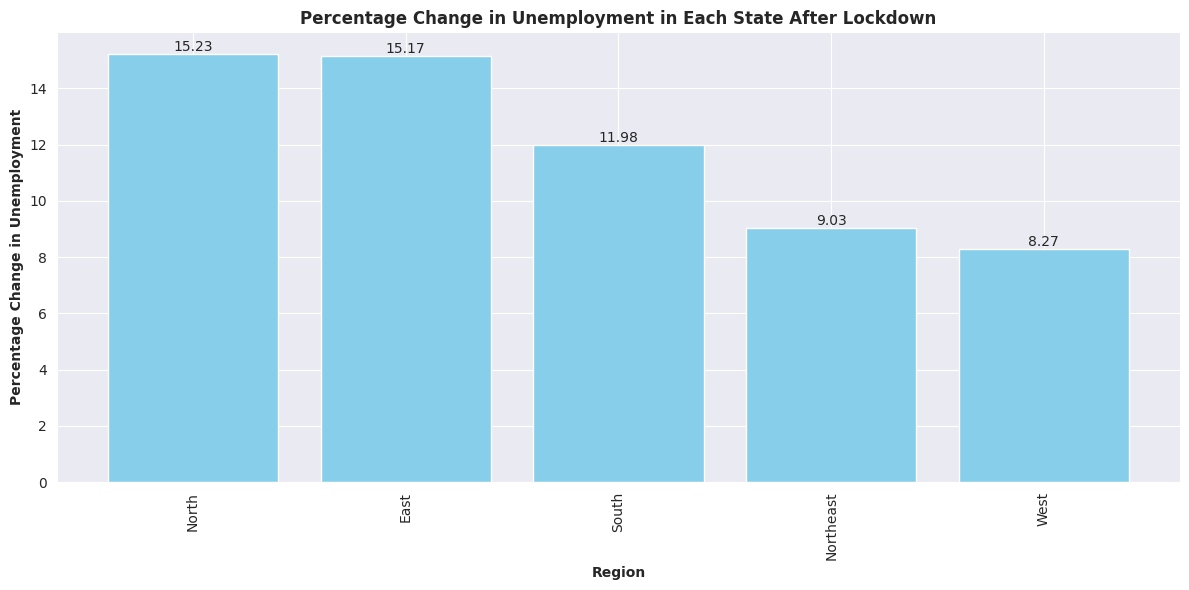

In [ ]:
Region = sorted_per['Region']
percentage_change = sorted_per['Percentage Change after lockdown']

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(states, percentage_change, color='skyblue')

# Add labels and title
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Percentage Change in Unemployment', fontweight='bold')
plt.title('Percentage Change in Unemployment in Each State After Lockdown', fontweight='bold')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [ ]:
#Percentage Change in each State
mean_unemployment_during['Percentage Change after lockdown'] = mean_unemployment_during['Unemployment Rate after lockdown'] - mean_unemployment_during['Unemployment Rate before lockdown'] / mean_unemployment_during['Unemployment Rate before lockdown']
sorted_per = mean_unemployment_during.sort_values('Percentage Change after lockdown', ascending = False
                                                    )
print(sorted_per)

              States  Unemployment Rate before lockdown  \
7            Haryana                              26.63   
17        Puducherry                              25.97   
10         Jharkhand                              29.27   
23           Tripura                              20.49   
2              Bihar                              25.52   
4              Delhi                              26.92   
19         Rajasthan                              15.31   
21        Tamil Nadu                              17.39   
8   Himachal Pradesh                              21.58   
9    Jammu & Kashmir                              15.85   
5                Goa                              16.09   
18            Punjab                              18.02   
26       West Bengal                              10.51   
25       Uttarakhand                               9.67   
12            Kerala                              11.56   
24     Uttar Pradesh                              11.81 

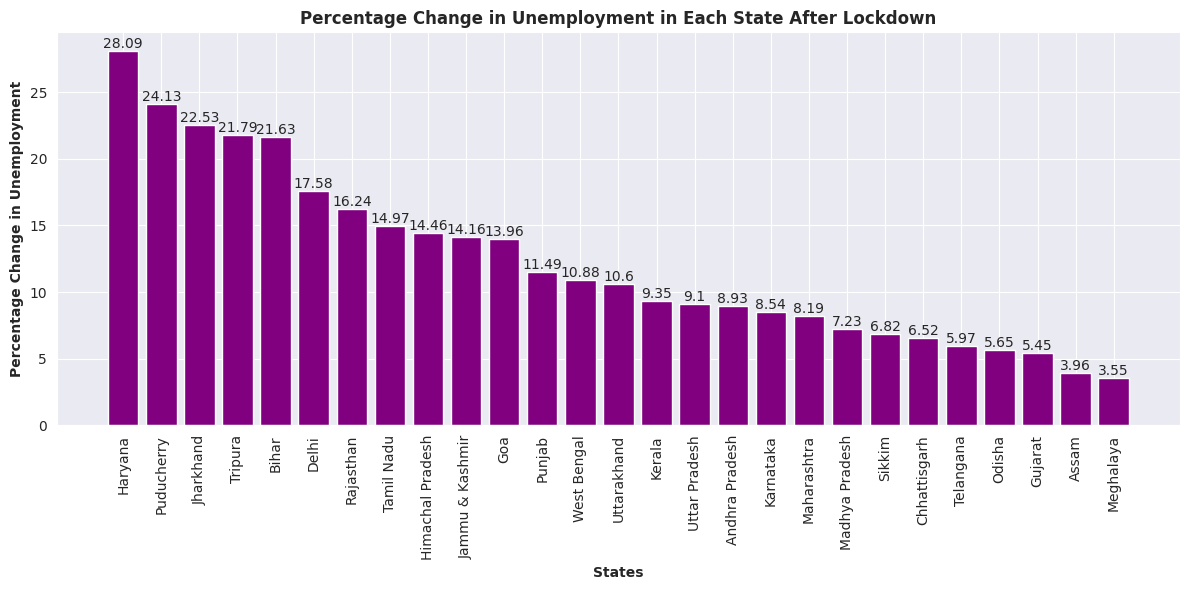

In [ ]:
states = sorted_per['States']
percentage_change = sorted_per['Percentage Change after lockdown']

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(states, percentage_change, color='Purple')

# Add labels and title
plt.xlabel('States', fontweight='bold')
plt.ylabel('Percentage Change in Unemployment', fontweight='bold')
plt.title('Percentage Change in Unemployment in Each State After Lockdown', fontweight='bold')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()